- Type of Data
    - Continuous
    - Discrete
    - Attribute
- Scale
    - Nominal
        - Different categories
        - There is no logical order to the categories
        - Does not depend on the order of data given
        - Languages I know, companies I've worked for
    - Ordinal
        - Different categories
        - There is a logical order to the categores
        - Used for sequencing or ranking
        - Rating something
    - Interval
        - We are not concerned about the actual count / measurement, we are just concerned about the interval/category it falls into.
        
_Both Nominal and ordinal will be used to collect `Attribute Type`_

# Nominal Logistic Regression
- Response is on the nominal scale and is an attribute data
- Eg
    - What do students do after graduating
        - PG
        - Job
        - Start their own business    

In [4]:
library(readxl)
library(nnet)

In [2]:
df = read_excel('LogisticRegression.xlsx',sheet='nominal')

In [3]:
head(df)

ses,write,prog
<chr>,<dbl>,<chr>
low,35,vocation
middle,33,general
high,39,vocation
low,37,vocation
middle,31,vocation
high,36,general


- Ses
    - Socio-Economic Status
- write
    - marks obtained
- prog
    - Program taken by the student

In [5]:
df$ses = as.factor(df$ses)
df$prog = as.factor(df$prog)

In [6]:
str(df)

tibble [200 × 3] (S3: tbl_df/tbl/data.frame)
 $ ses  : Factor w/ 3 levels "high","low","middle": 2 3 1 2 3 1 3 3 3 3 ...
 $ write: num [1:200] 35 33 39 37 31 36 36 31 41 37 ...
 $ prog : Factor w/ 3 levels "academic","general",..: 3 2 3 3 3 2 3 3 3 3 ...


In [7]:
df$ses = relevel(df$ses,ref='low')
df$prog = relevel(df$prog,ref='academic')

In [8]:
mod = multinom(prog ~ ses + write,data=df)

# weights:  15 (8 variable)
initial  value 219.722458 
iter  10 value 179.982880
final  value 179.981726 
converged


In [9]:
summary(mod)

Call:
multinom(formula = prog ~ ses + write, data = df)

Coefficients:
         (Intercept)    seshigh  sesmiddle      write
general     2.852198 -1.1628226 -0.5332810 -0.0579287
vocation    5.218260 -0.9826649  0.2913859 -0.1136037

Std. Errors:
         (Intercept)   seshigh sesmiddle      write
general     1.166441 0.5142196 0.4437323 0.02141097
vocation    1.163552 0.5955665 0.4763739 0.02221996

Residual Deviance: 359.9635 
AIC: 375.9635 

- (G,W)
    - log of odds of student taking general instead of academic decreases by ~0.05 if marks increase
- If you are coming from a high income group, then as compered to someone from low income group, you have an inclination more towards the academic courses as compared to the general course because the coefficient is negative

In [11]:
z = summary(mod)$coefficients/summary(mod)$standard.errors

In [12]:
z

,(Intercept),seshigh,sesmiddle,write
general,2.445214,-2.261334,-1.2018081,-2.705562
vocation,4.484769,-1.649967,0.6116747,-5.112689


In [13]:
p = (1 - pnorm(abs(z), 0, 1)) * 2

In [14]:
p

,(Intercept),seshigh,sesmiddle,write
general,0.0144766100,0.02373856,0.2294379,6.818902e-03
vocation,0.0000072993,0.09894976,0.5407530,3.176045e-07


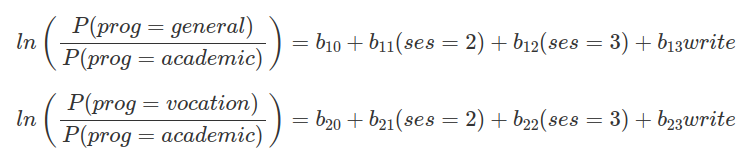
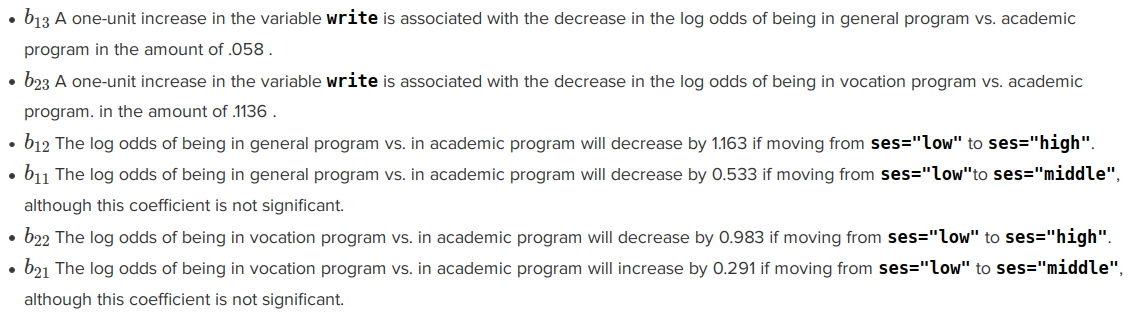

# Ordinal

In [11]:
library(Hmisc)

In [12]:
library(MASS)

In [6]:
library(readxl)

Oridnal scale - ranking / rating<br>
i.e categories will have a logical order, change in order will impact the result
<br><em>When type of data is attribute and type of data is ordinal</em>

In [7]:
df = read_excel('LogisticRegression.xlsx',sheet='ordinal2')

In [8]:
df$Survival = as.factor(df$Survival)
df$Region = as.factor(df$Region)

In [9]:
str(df)

tibble [73 × 3] (S3: tbl_df/tbl/data.frame)
 $ Survival  : Factor w/ 3 levels "1","2","3": 1 1 2 3 2 1 2 3 2 1 ...
 $ Region    : Factor w/ 2 levels "1","2": 1 2 1 2 1 1 2 1 1 2 ...
 $ ToxicLevel: num [1:73] 62 46 48.5 32 63.5 ...


In [23]:
mod = polr(Survival ~ Region + ToxicLevel,data=df,Hess=TRUE)

In [24]:
summary(mod)

Call:
polr(formula = Survival ~ Region + ToxicLevel, data = df, Hess = TRUE)

Coefficients:
             Value Std. Error t value
Region2    -0.2015    0.49300 -0.4086
ToxicLevel -0.1213    0.03471 -3.4946

Intercepts:
    Value   Std. Error t value
1|2 -7.0434  1.7025    -4.1371
2|3 -3.5227  1.4818    -2.3773

Residual Deviance: 118.5799 
AIC: 126.5799 

- 1 is the worst survival rating, 3 is the best

- As one goes from Region1 to Region2 the survival rating goes from 3 to 2 or 2 to 1 or 3 to 1
- If toxic level increases then suvival rating goes down

In [25]:
ctable = coef(summary(mod))

In [26]:
ctable

,Value,Std. Error,t value
Region2,-0.2014544,0.49299720,-0.4086319
ToxicLevel,-0.1212892,0.03470746,-3.4946162
1|2,-7.0434351,1.70252014,-4.1370642
2|3,-3.5227278,1.48179928,-2.3773313


In [27]:
p = pnorm(abs(ctable[,'t value']),lower.tail = FALSE) * 2

In [28]:
p

Region2   ToxicLevel          1|2          2|3 
6.828098e-01 4.747438e-04 3.517778e-05 1.743842e-02

- 1|2 and 2|3 is the degree of difference between 1 and 2 and 2 and 3
- Whether the the difference between the categories can be ignored?
<br>Ho: Categories are same
<br>H1: Categories ain't same

In [29]:
data = data.frame(Region=c('1','2'),ToxicLevel= 50)

In [31]:
data

Region,ToxicLevel
<chr>,<dbl>
1,50
2,50


In [30]:
predict(mod,data,type='probs')

,1,2,3
1,0.2730956,0.6539206,0.07298375
2,0.3148549,0.6246726,0.06047248


In [32]:
data = data.frame(Region = '1',ToxicLevel = c(20,40,50,60,80))

In [33]:
predict(mod,data,type='probs')

,1,2,3
1,0.009779394,0.2405337,0.749686870
2,0.100483362,0.6901656,0.209350997
3,0.273095615,0.6539206,0.072983749
4,0.558214652,0.4189116,0.022873732
5,0.934606596,0.0633281,0.002065302


prac

In [34]:
df = read_excel('LogisticRegression.xlsx',sheet='ordinal1')

In [35]:
head(df)

apply,pared,public,gpa
<chr>,<dbl>,<dbl>,<dbl>
very likely,0,0,3.26
somewhat likely,1,0,3.21
unlikely,1,1,3.94
somewhat likely,0,0,2.81
somewhat likely,0,0,2.53
unlikely,0,1,2.59


In [36]:
df$apply = as.factor(df$apply)
df$pared = as.factor(df$pared)
df$public = as.factor(df$public)

In [37]:
str(df)

tibble [400 × 4] (S3: tbl_df/tbl/data.frame)
 $ apply : Factor w/ 3 levels "somewhat likely",..: 3 1 2 1 1 2 1 1 2 1 ...
 $ pared : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 1 1 2 ...
 $ public: Factor w/ 2 levels "0","1": 1 1 2 1 1 2 1 1 1 1 ...
 $ gpa   : num [1:400] 3.26 3.21 3.94 2.81 2.53 ...


In [45]:
levels(df$apply)

[1] "somewhat likely" "unlikely"        "very likely"

In [39]:
mod1 = polr(apply ~ pared + public + gpa,data=df,Hess=TRUE)

In [40]:
summary(mod1)

Call:
polr(formula = apply ~ pared + public + gpa, data = df, Hess = TRUE)

Coefficients:
          Value Std. Error t value
pared1  -0.2635     0.2876 -0.9162
public1  0.5600     0.2955  1.8953
gpa     -0.0708     0.2533 -0.2795

Intercepts:
                         Value   Std. Error t value
somewhat likely|unlikely -0.7959  0.7516    -1.0589
unlikely|very likely      2.0445  0.7606     2.6882

Residual Deviance: 736.9261 
AIC: 746.9261 

In [42]:
ctable = coef(summary(mod1))
ctable

,Value,Std. Error,t value
pared1,-0.26352826,0.2876425,-0.9161658
public1,0.55999663,0.2954713,1.8952655
gpa,-0.07080247,0.2533390,-0.2794772
somewhat likely|unlikely,-0.79587821,0.7516351,-1.0588625
unlikely|very likely,2.04454674,0.7605593,2.6882148


In [43]:
p = pnorm(abs(ctable[,'t value']),lower.tail = FALSE) * 2

In [44]:
p

pared1                  public1                      gpa 
             0.359579940              0.058057240              0.779878661 
somewhat likely|unlikely     unlikely|very likely 
             0.289662386              0.007183518

In [46]:
(ctable <- cbind(ctable, "p value" = p))

,Value,Std. Error,t value,p value
pared1,-0.26352826,0.2876425,-0.9161658,0.359579940
public1,0.55999663,0.2954713,1.8952655,0.058057240
gpa,-0.07080247,0.2533390,-0.2794772,0.779878661
somewhat likely|unlikely,-0.79587821,0.7516351,-1.0588625,0.289662386
unlikely|very likely,2.04454674,0.7605593,2.6882148,0.007183518


In [47]:
confint.default(mod1)

,2.5 %,97.5 %
pared1,-0.82729727,0.3002408
public1,-0.01911656,1.1391098
gpa,-0.56733779,0.4257329


In [49]:
exp(coef(mod1))
# odd ratios

pared1   public1       gpa 
0.7683359 1.7506666 0.9316459

In [51]:
exp(cbind(OR = coef(mod1), confint.default(mod1)))

,OR,2.5 %,97.5 %
pared1,0.7683359,0.4372294,1.350184
public1,1.7506666,0.9810650,3.123986
gpa,0.9316459,0.5670330,1.530712
